In [4]:
from sigpy.mri import spiral
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
help(spiral)

Help on function spiral in module sigpy.mri.samp:

spiral(fov, N, f_sampling, R, ninterleaves, alpha, gm, sm, gamma=267800000.0)
    Generate variable density spiral trajectory.
    
    Args:
        fov (float): field of view in meters.
        N (int): effective matrix shape.
        f_sampling (float): undersampling factor in freq encoding direction.
        R (float): undersampling factor.
        ninterleaves (int): number of spiral interleaves
        alpha (float): variable density factor
        gm (float): maximum gradient amplitude (T/m)
        sm (float): maximum slew rate (T/m/s)
        gamma (float): gyromagnetic ratio in rad/T/s
    
    Returns:
        array: spiral coordinates.
    
    References:
        Dong-hyun Kim, Elfar Adalsteinsson, and Daniel M. Spielman.
        'Simple Analytic Variable Density Spiral Design.' MRM 2003.



In [612]:
gm = 80*10**-3
sm = 200
alpha=128
k_max=2*np.pi
N=256
fov = N/k_max
ninterleaves = 1
R = 4*16
f_sampling=0.1


In [613]:
lambd = k_max/2
w=2*np.pi*ninterleaves

In [614]:
Tea = 267800000*gm/(lambd*w)*(alpha+1)

In [615]:
Tea

140010474.97379717

In [616]:
test=spiral(fov, N, f_sampling, R, ninterleaves, alpha, gm, sm)

1163.4286243585198
1.3225111659389472e-06
0.00013708219197223923
0.007616030074601334
0.00013708219197223923


In [617]:
test.shape

(239, 2)

In [618]:
547*8

4376

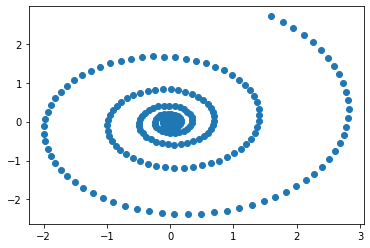

In [619]:
plt.scatter(x=test[:,0],y=test[:,1])

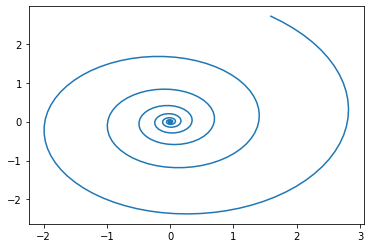

In [620]:
plt.plot(test[:,0],test[:,1])

In [256]:
test_rotated = 

SyntaxError: invalid syntax (<ipython-input-256-d4dadcdcb734>, line 1)

In [2]:
test.shape

NameError: name 'test' is not defined

In [3]:
fov

NameError: name 'fov' is not defined

In [465]:
res = fov/N

lam = .5 / res
1 / (1 - (1 - ninterleaves * R / fov / lam) ** (1 / alpha))

33027370.275730208

In [496]:
alpha

1048576

In [502]:
(1-1/n)**alpha

1.0182202130902542e-16

In [503]:
n=32
(1-(1-1/n)**alpha)*fov*lam/1

125.80057298293531

In [187]:
def spiral(fov, N, f_sampling, R, ninterleaves, alpha, gm, sm, gamma=2.678e8):
    """Generate variable density spiral trajectory.

    Args:
        fov (float): field of view in meters.
        N (int): effective matrix shape.
        f_sampling (float): undersampling factor in freq encoding direction.
        R (float): undersampling factor.
        ninterleaves (int): number of spiral interleaves
        alpha (float): variable density factor
        gm (float): maximum gradient amplitude (T/m)
        sm (float): maximum slew rate (T/m/s)
        gamma (float): gyromagnetic ratio in rad/T/s

    Returns:
        array: spiral coordinates.

    References:
        Dong-hyun Kim, Elfar Adalsteinsson, and Daniel M. Spielman.
        'Simple Analytic Variable Density Spiral Design.' MRM 2003.

    """
    res = fov/N

    lam = .5 / res  # in m**(-1)
    n = 1 / (1 - (1 - ninterleaves * R / fov / lam) ** (1 / alpha))
    w = 2 * np.pi * n
    Tea = lam * w / gamma / gm / (alpha + 1)  # in s
    Tes = np.sqrt(lam * w ** 2 / sm / gamma) / (alpha / 2 + 1)  # in s
    Ts2a = (Tes ** ((alpha + 1) / (alpha / 2 + 1)) *
            (alpha / 2 + 1) / Tea / (alpha + 1)) ** (1 + 2 / alpha)  # in s
    
    print(w)
    print(Tea)
    print(Tes)
    print(Ts2a)

    if Ts2a < Tes:
        tautrans = (Ts2a / Tes) ** (1 / (alpha / 2 + 1))

        def tau(t):
            return (t / Tes) ** (1 / (alpha / 2 + 1)) * (0 <= t) * \
                (t <= Ts2a) + ((t - Ts2a) / Tea +
                               tautrans ** (alpha + 1)) ** (1 / (alpha + 1))\
                * (t > Ts2a) * (t <= Tea) * (Tes >= Ts2a)
        Tend = Tea
    else:

        def tau(t):
            return (t / Tes) ** (1 / (alpha / 2 + 1)) * (0 <= t) * (t <= Tes)
        Tend = Tes

    def k(t):
        return lam * tau(t) ** alpha * np.exp(w * tau(t) * 1j)
    dt = Tea * 1E-4  # in s

    Dt = dt * f_sampling / fov / abs(k(Tea) - k(Tea - dt))  # in s

    print(Tend)

    t = np.linspace(0, Tend, int(Tend / Dt))
    kt = k(t)  # in rad

    # generating cloned interleaves
    k = kt
    for i in range(1, ninterleaves):
        k = np.hstack((k, kt[0:] * np.exp(2 * np.pi * 1j * i / ninterleaves)))

    k = np.stack((np.real(k), np.imag(k)), axis=1)

    return k

In [189]:
def spiral_modif(fov, N, npoint,Tend, ninterleaves, alpha, gm, sm, gamma=2.678e8):
    """Generate variable density spiral trajectory.

    Args:
        fov (float): field of view in meters.
        N (int): effective matrix shape.
        f_sampling (float): undersampling factor in freq encoding direction.
        R (float): undersampling factor.
        ninterleaves (int): number of spiral interleaves
        alpha (float): variable density factor
        gm (float): maximum gradient amplitude (T/m)
        sm (float): maximum slew rate (T/m/s)
        gamma (float): gyromagnetic ratio in rad/T/s

    Returns:
        array: spiral coordinates.

    References:
        Dong-hyun Kim, Elfar Adalsteinsson, and Daniel M. Spielman.
        'Simple Analytic Variable Density Spiral Design.' MRM 2003.

    """
    res = fov/N

    lam = .5 / res  # in m**(-1)
    w = gamma*gm*(alpha+1)*Tend/lam
    
    
    
    #n = 1 / (1 - (1 - ninterleaves * R / fov / lam) ** (1 / alpha))
    #w = 2 * np.pi * n
    Tea = lam * w / gamma / gm / (alpha + 1)  # in s
    Tes = np.sqrt(lam * w ** 2 / sm / gamma) / (alpha / 2 + 1)  # in s
    Ts2a = (Tes ** ((alpha + 1) / (alpha / 2 + 1)) *
            (alpha / 2 + 1) / Tea / (alpha + 1)) ** (1 + 2 / alpha)  # in s
    
    print(w)
    print(Tea)
    print(Tes)
    print(Ts2a)

    if Ts2a < Tes : 
        w=w
    else:
        w=(alpha/2+1)*Tend/np.sqrt(sm*gamma/lam) 
        Tea = lam * w / gamma / gm / (alpha + 1)  # in s
        Tes = np.sqrt(lam * w ** 2 / sm / gamma) / (alpha / 2 + 1)  # in s
        Ts2a = (Tes ** ((alpha + 1) / (alpha / 2 + 1)) *
            (alpha / 2 + 1) / Tea / (alpha + 1)) ** (1 + 2 / alpha)  # in s
    
    n = w/(2*np.pi)
    
    R = (1-(1-1/n)**alpha)*fov*lam/ninterleaves

    if Ts2a < Tes:
        tautrans = (Ts2a / Tes) ** (1 / (alpha / 2 + 1))

        def tau(t):
            return (t / Tes) ** (1 / (alpha / 2 + 1)) * (0 <= t) * \
                (t <= Ts2a) + ((t - Ts2a) / Tea +
                               tautrans ** (alpha + 1)) ** (1 / (alpha + 1))\
                * (t > Ts2a) * (t <= Tea) * (Tes >= Ts2a)
        Tend = Tea
    else:

        def tau(t):
            return (t / Tes) ** (1 / (alpha / 2 + 1)) * (0 <= t) * (t <= Tes)
        Tend = Tes

        
    print("Undersampling : {}".format(R))
    print("Time : {}".format(Tend))
    
    def k(t):
        return lam * tau(t) ** alpha * np.exp(w * tau(t) * 1j)
    dt = Tea * 1E-4  # in s
    
    f_sampling = Tend/(dt*npoint)*fov*abs(k(Tea) - k(Tea - dt))
    
    Dt = dt * f_sampling / fov / abs(k(Tea) - k(Tea - dt))  # in s

    

    t = np.linspace(0, Tend, int(Tend / Dt))
    kt = k(t)  # in rad

    # generating cloned interleaves
    k = kt
    for i in range(1, ninterleaves):
        k = np.hstack((k, kt[0:] * np.exp(2 * np.pi * 1j * i / ninterleaves)))

    k = np.stack((np.real(k), np.imag(k)), axis=1)

    return k

In [190]:
npoint = 512
Tend = 1*10**-3

In [191]:
test = spiral_modif(fov, N, npoint,Tend, 1, alpha, gm, sm)

34097.35500800766
0.001
0.08704705624993575
32.855803879469185
Undersampling : -7.158562303676025e+35
Time : 5.86555760565682e-14


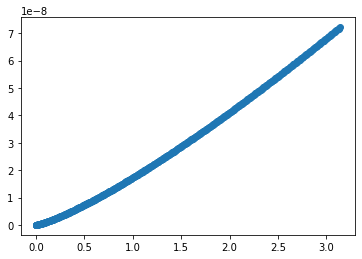

In [181]:
plt.scatter(x=test[:,0],y=test[:,1])